<a href="https://colab.research.google.com/github/AmrMomtaz/Iris-Dataset-Exploration/blob/main/Iris-Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Iris dataset exploration
In this notebook I will discover the Iris dataset and make visualizations (using univariate,bivariate and multivariate plots) and also display the dataset in tabular form and show the correlation between different features.<br>
Please note that all the measurments are in cm.

## Installation
In this section I am going to load the libraries and load the data and show describe the data and show the data in tabular form

In [ ]:
#Importing the libraries and the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from mpl_toolkits import mplot3d
from sklearn.datasets import load_iris


iris = load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
#Appending the class (target) to the dataframe
dictionary = {0:'setosa', 1:'versicolor', 2:'virginica'}
df['target'] = df.target.apply(lambda x : dictionary.get(x))
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width','class']
print(f'Dataframe shape = {df.shape}')
print(f'Duplicated rows = {sum(df.duplicated())}')
print(f'Features : {iris.feature_names}')
df.head()

Dataframe shape = (150, 5)
Duplicated rows = 1
Features : ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


As we can see the dataset consists of 150 rows where there is one duplicated row and it consists of 4 features which are [ sepal length , sepal width , petal length , petal width] and the class (target) for each row.

In [ ]:
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


We can see that there is no null values in all the columns and all the datatypes are correct (float64). We can see that each feature has different mean and standard deviation which will be visualized in the plots also.

##Visualization
This section will contain the univariate plots where I will discover each class alone and contrast the differences between them. and plot different features togther.

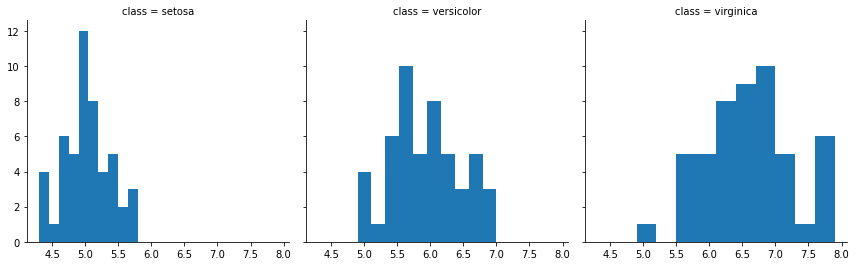

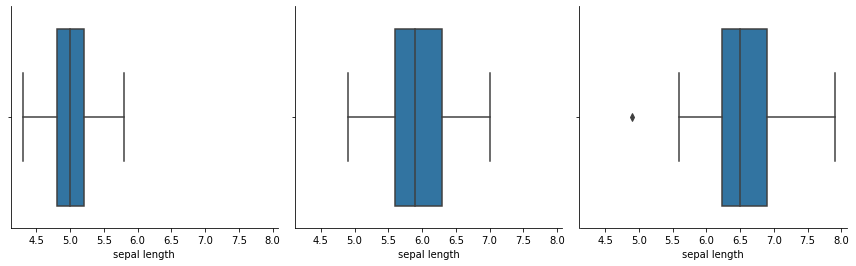

In [ ]:
g = sb.FacetGrid(data = df, col = 'class', height = 4);
g.map(plt.hist, 'sepal length');
g.set_xlabels('')
g = sb.FacetGrid(data = df, col = 'class', height = 4);
g.map(sb.boxplot, 'sepal length',order = ['setosa','versicolor','virginica']);
g.set_titles('');

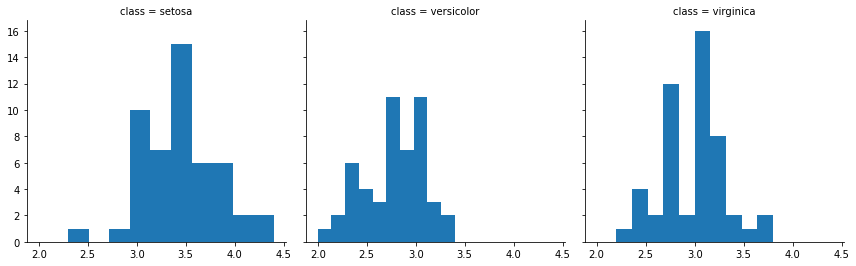

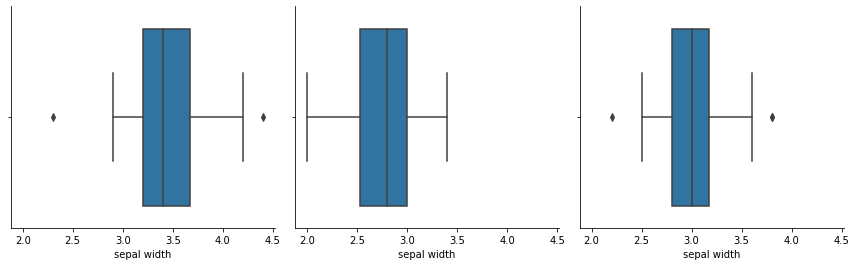

In [ ]:
g = sb.FacetGrid(data = df, col = 'class', height = 4);
g.map(plt.hist, 'sepal width');
g.set_xlabels('')
g = sb.FacetGrid(data = df, col = 'class', height = 4);
g.map(sb.boxplot, 'sepal width',order = ['setosa','versicolor','virginica']);
g.set_titles('');

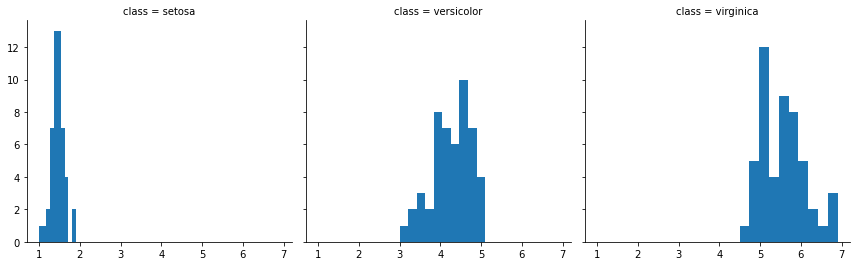

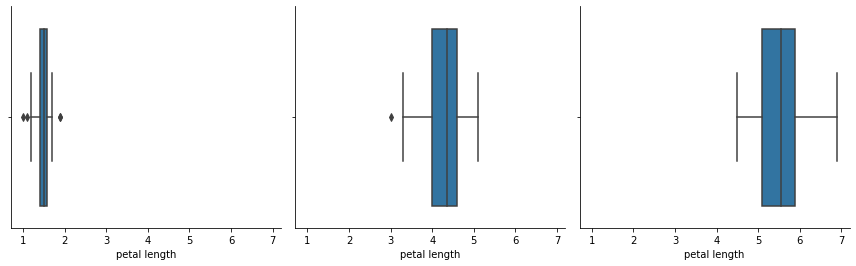

In [ ]:
g = sb.FacetGrid(data = df, col = 'class', height = 4);
g.map(plt.hist, 'petal length');
g.set_xlabels('')
g = sb.FacetGrid(data = df, col = 'class', height = 4);
g.map(sb.boxplot, 'petal length',order = ['setosa','versicolor','virginica']);
g.set_titles('');

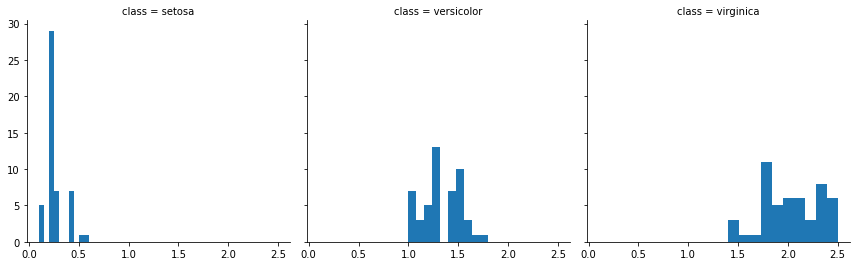

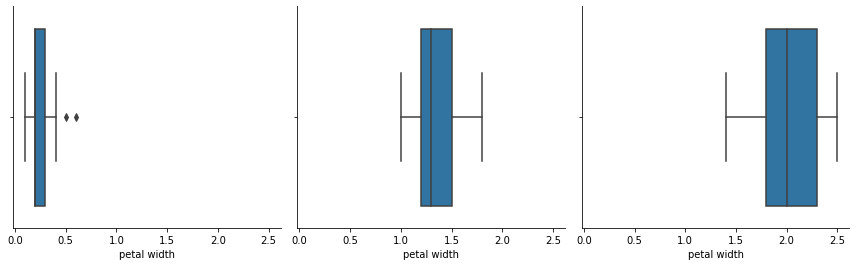

In [ ]:
g = sb.FacetGrid(data = df, col = 'class', height = 4);
g.map(plt.hist, 'petal width');
g.set_xlabels('')
g = sb.FacetGrid(data = df, col = 'class', height = 4);
g.map(sb.boxplot, 'petal width',order = ['setosa','versicolor','virginica']);
g.set_titles('');

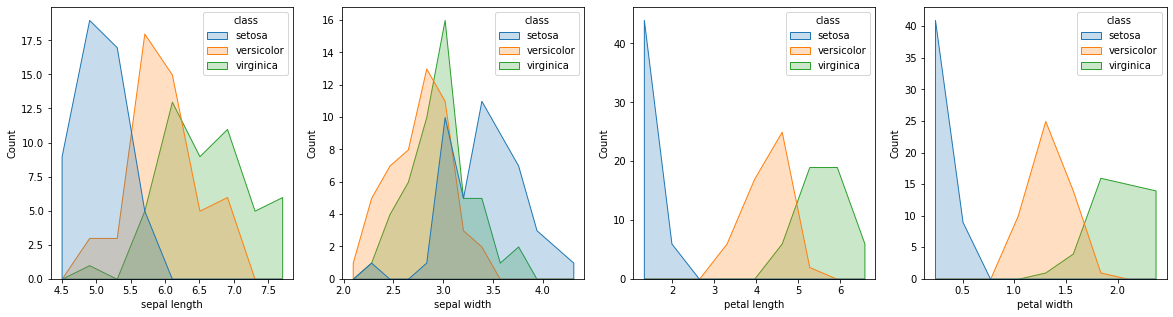

In [ ]:
plt.figure(figsize = [20, 5])
plt.subplot(1, 4, 1)
sb.histplot(data=df,x = 'sepal length',hue='class',element = 'poly');
plt.subplot(1, 4, 2)
sb.histplot(data=df,x = 'sepal width',hue='class',element = 'poly');
plt.subplot(1, 4, 3)
sb.histplot(data=df,x = 'petal length',hue='class',element = 'poly');
plt.subplot(1, 4, 4)
sb.histplot(data=df,x = 'petal width',hue='class',element = 'poly');

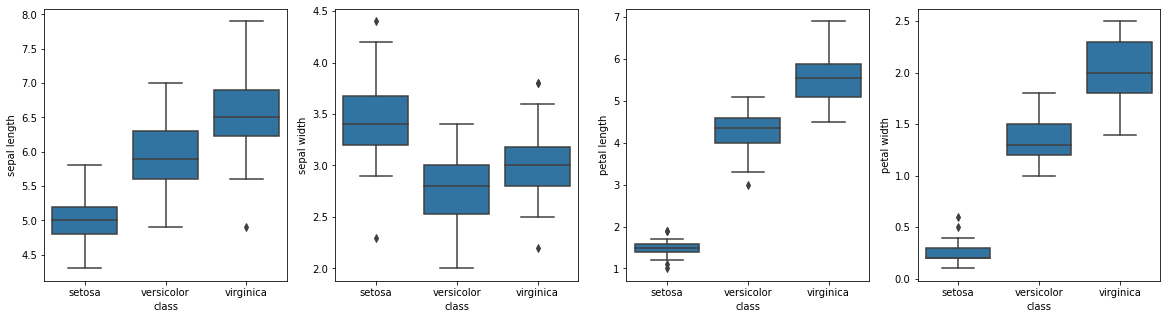

In [ ]:
plt.figure(figsize = [20, 5])
base_color = sb.color_palette()[0]
plt.subplot(1, 4, 1)
sb.boxplot(data=df, x='class', y='sepal length', color = base_color)
plt.subplot(1, 4, 2)
sb.boxplot(data=df, x='class', y='sepal width', color = base_color)
plt.subplot(1, 4, 3)
sb.boxplot(data=df, x='class', y='petal length', color = base_color)
plt.subplot(1, 4, 4)
sb.boxplot(data=df, x='class', y='petal width', color = base_color)

In [ ]:
print(f'Setosa class:\n{df[df["class"]=="setosa"].describe()[1:]}')
print(f'Versicolor class:\n{df[df["class"]=="versicolor"].describe()[1:]}')
print(f'Virginica class:\n{df[df["class"]=="virginica"].describe()[1:]}')

Setosa class:
      sepal length  sepal width  petal length  petal width
mean       5.00600     3.428000      1.462000     0.246000
std        0.35249     0.379064      0.173664     0.105386
min        4.30000     2.300000      1.000000     0.100000
25%        4.80000     3.200000      1.400000     0.200000
50%        5.00000     3.400000      1.500000     0.200000
75%        5.20000     3.675000      1.575000     0.300000
max        5.80000     4.400000      1.900000     0.600000
Versicolor class:
      sepal length  sepal width  petal length  petal width
mean      5.936000     2.770000      4.260000     1.326000
std       0.516171     0.313798      0.469911     0.197753
min       4.900000     2.000000      3.000000     1.000000
25%       5.600000     2.525000      4.000000     1.200000
50%       5.900000     2.800000      4.350000     1.300000
75%       6.300000     3.000000      4.600000     1.500000
max       7.000000     3.400000      5.100000     1.800000
Virginica class:
      s

###From the above we can see the following:

#### Setosa class has the following:
* Least sepal length
* Most sepal width
* Least petal length (Huge difference from other classes)
* Least petal width (Huge difference from other classes also)

#### Versicolor class has the following:
* Medium sepal length
* least sepal width
* Medium petal length
* Medium petal width (Big difference from other classes)

#### Virginica  class has the following:
* Most sepal length
* Medium sepal width
* Most petal length
* Most petal width (Big difference from other classes)

There aren't a lot of outliers in the data. The petal length of setosa has the most outliers.

We can conclude that the setosa flower is more likely to be the smallest one (in size) then the versicolor and the virginica flower the biggest among the three (based on the mean of each of the four attributes).

              sepal length  sepal width  petal length  petal width
sepal length      1.000000    -0.117570      0.871754     0.817941
sepal width      -0.117570     1.000000     -0.428440    -0.366126
petal length      0.871754    -0.428440      1.000000     0.962865
petal width       0.817941    -0.366126      0.962865     1.000000


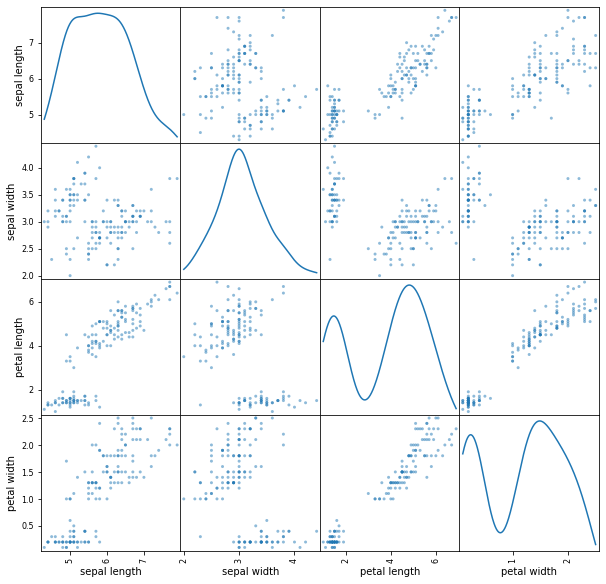

In [ ]:
pd.plotting.scatter_matrix(df,figsize = (10,10),diagonal = 'kde');
print(df.corr())

#### From the scatter plots and the correlation matrix we can conclude the following:
* There is a weak negative correaltion between the sepal length and the sepal width
* There is string positive correlation between the sepal length and petal length and width
* The sepal width is negatibely correlated with all other attributes. weak correlation with the sepal length as said before and medium correlation with both the petal length and width
* Finally the petal length and width is stronly correleted positively where the correlation = 0.962885

Text(0.5, 0, 'petal length')

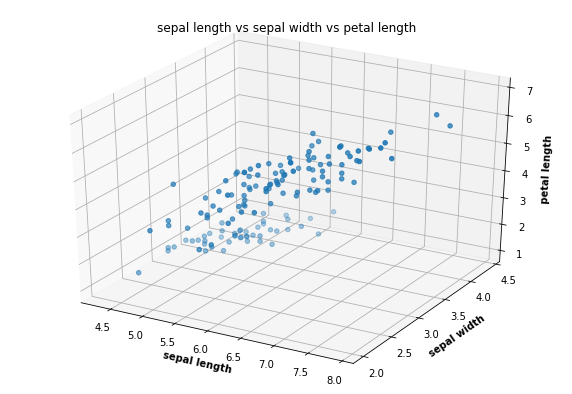

In [ ]:
X = 'sepal length'
Y = 'sepal width'
Z = 'petal length'
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.set_title(f'{X} vs {Y} vs {Z}')
ax.scatter3D(df[X],df[Y], df[Z])
ax.set_xlabel(X, fontweight ='bold')
ax.set_ylabel(Y, fontweight ='bold')
ax.set_zlabel(Z, fontweight ='bold')

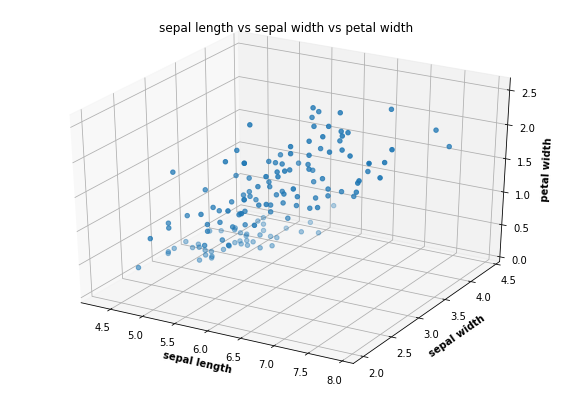

In [ ]:
X = 'sepal length'
Y = 'sepal width'
Z = 'petal width'
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.set_title(f'{X} vs {Y} vs {Z}')
ax.scatter3D(df[X],df[Y], df[Z])
ax.set_xlabel(X, fontweight ='bold')
ax.set_ylabel(Y, fontweight ='bold')
ax.set_zlabel(Z, fontweight ='bold');

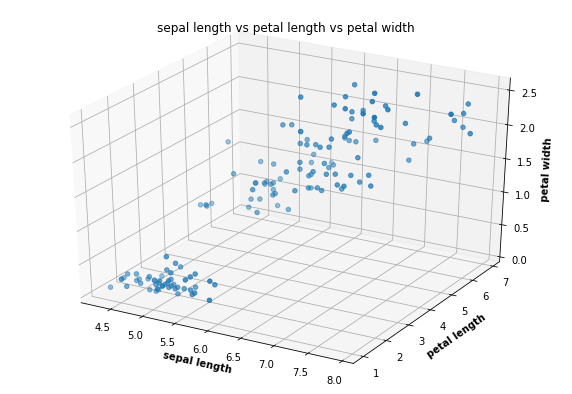

In [ ]:
X = 'sepal length'
Y = 'petal length'
Z = 'petal width'
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.set_title(f'{X} vs {Y} vs {Z}')
ax.scatter3D(df[X],df[Y], df[Z])
ax.set_xlabel(X, fontweight ='bold')
ax.set_ylabel(Y, fontweight ='bold')
ax.set_zlabel(Z, fontweight ='bold');

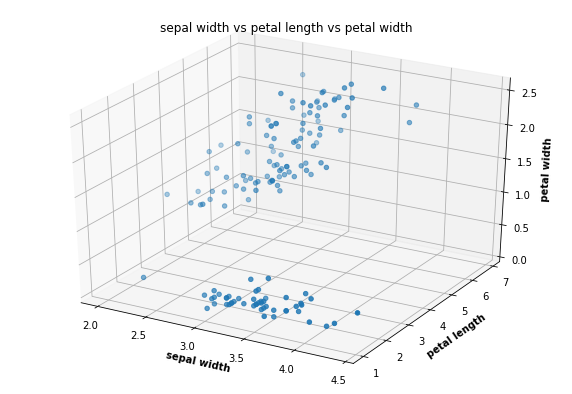

In [ ]:
X = 'sepal width'
Y = 'petal length'
Z = 'petal width'
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.set_title(f'{X} vs {Y} vs {Z}')
ax.scatter3D(df[X],df[Y], df[Z])
ax.set_xlabel(X, fontweight ='bold')
ax.set_ylabel(Y, fontweight ='bold')
ax.set_zlabel(Z, fontweight ='bold');